In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask
import cftime
import random
import glob
import matplotlib.gridspec as gs
import pint_xarray
import cf_xarray as cfxr
from eofs.xarray import Eof

In [2]:
#import dask to parallelise
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42095 instead
  warnings.warn(


In [3]:
#load in 2 restart files from first memebrs

In [6]:
EP1 = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/Mod_ENSO_pert1/0990/EP_elnino_0990.nc", decode_times = False)

In [11]:
CP1 = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/Had_ENSO_pert2/0990/CP_elnino_0990.nc", decode_times = False)

In [33]:
EP2 = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/Had_ENSO_pert/0990/EP_elnino_0990.nc", decode_times = False)

In [9]:
CP2 = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/Had_ENSO_pert1/0990/CP_elnino_0990.nc", decode_times = False)

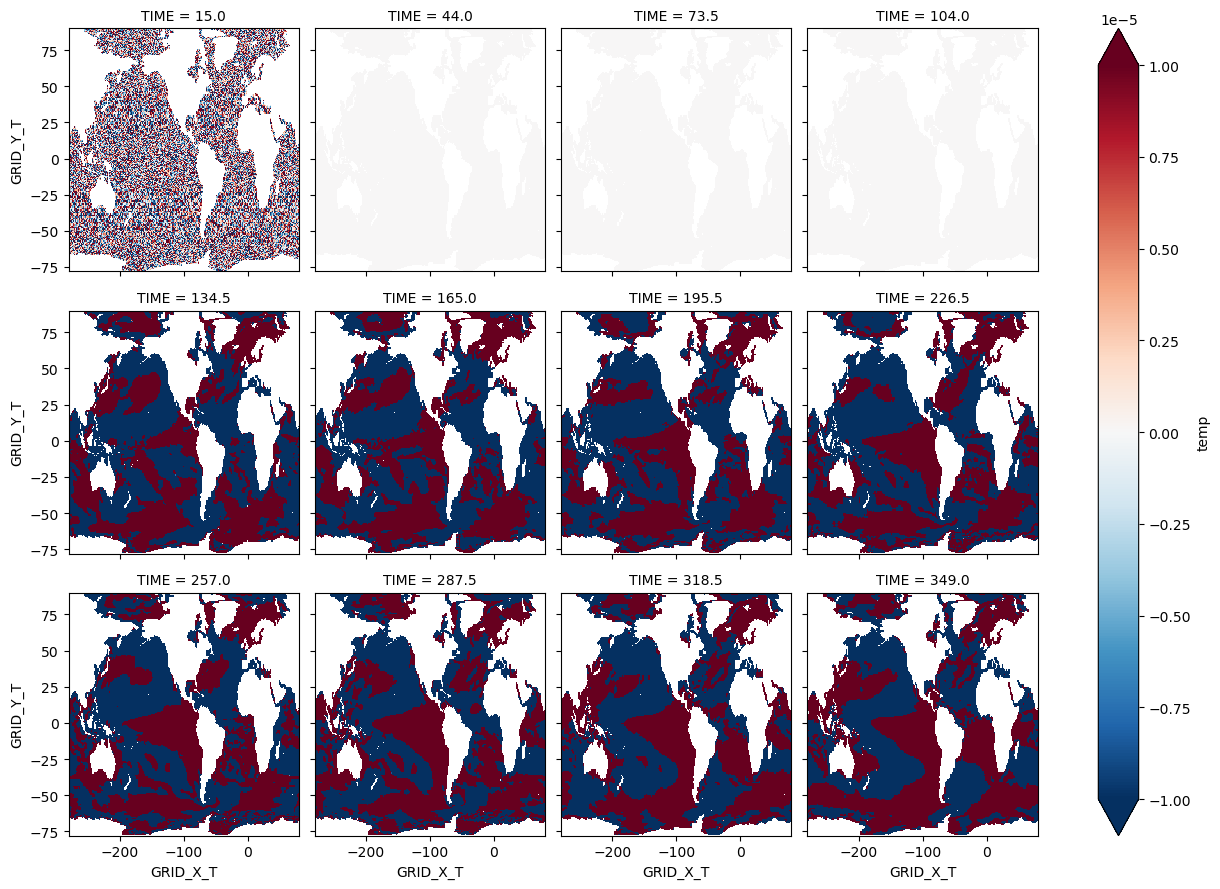

In [7]:
(EP1.temp[0] - CP1.temp[0]).plot(col = "TIME", col_wrap = 4, vmin = -1e-5)

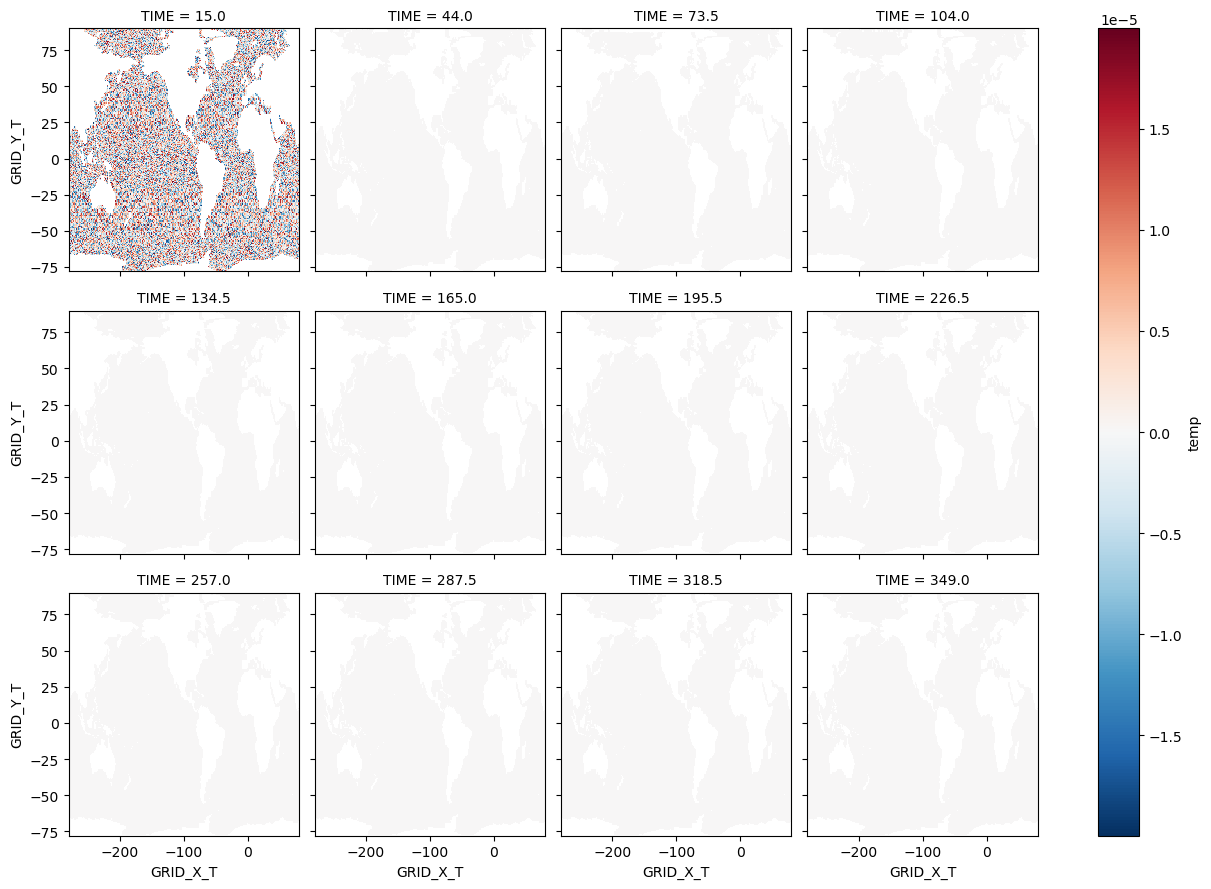

In [12]:
(CP1.temp[0] - CP2.temp[0]).plot(col = "TIME", col_wrap = 4)

In [40]:
from numpy.random import MT19937, RandomState, SeedSequence

In [41]:
seed1 = 1234

In [42]:
seed2 = 1235

In [43]:
rs1 = RandomState(MT19937(SeedSequence(seed1)))

In [44]:
rs2 = RandomState(MT19937(SeedSequence(seed2)))

In [45]:
amplitude = 0.00001# 10^-5

In [46]:
# Set up theta perturbation.
nlon = 360
nlat = 300
perturb1 = amplitude * (2.*rs1.random(nlon*nlat).reshape((nlat,nlon)) - 1.)

In [47]:
# Set up theta perturbation.
nlon = 360
nlat = 300
perturb2 = amplitude * (2.*rs2.random(nlon*nlat).reshape((nlat,nlon)) - 1.)

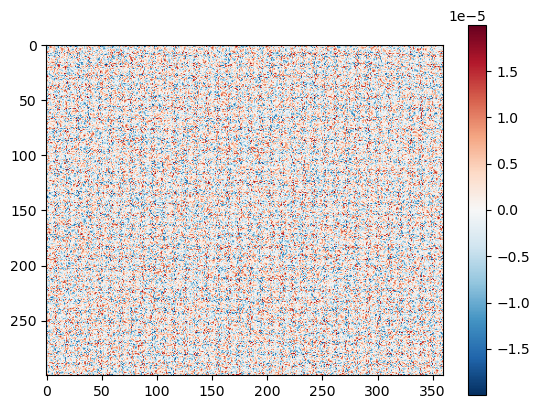

In [52]:
plt.imshow((perturb1- perturb2), cmap = "RdBu_r")
plt.colorbar()

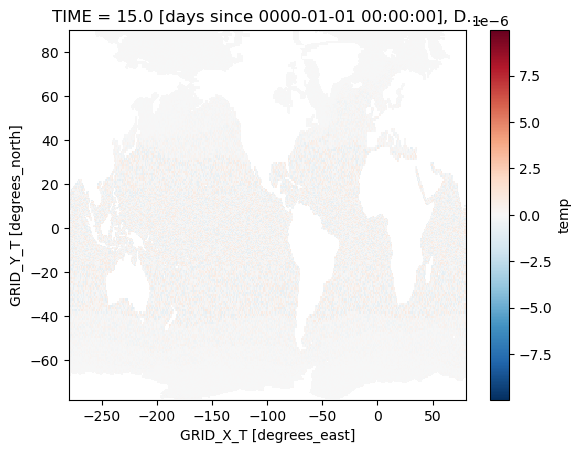

In [58]:
(CP1.temp[0,0] - CP2.temp[0,0]  - perturb2).plot()

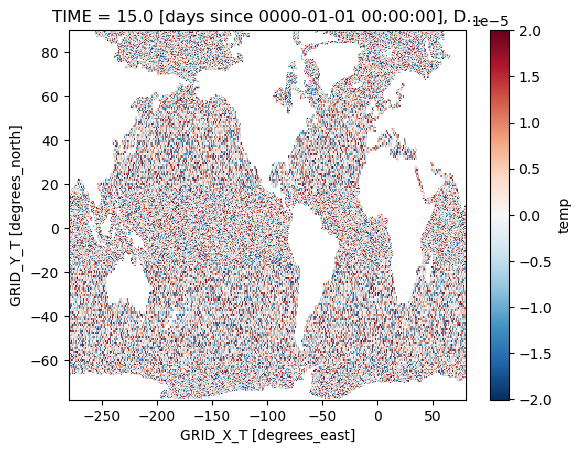

In [53]:
(CP1.temp[0,0] - CP2.temp[0,0]).plot()